#### 
NAME  : RAHINI DEVI

ROLLNO: 225229129

## PDL_Lab - 9 (Image Classification using CNN for CIFAR-10 Data)

### Part - I : Baseline Model

#### 1. Import libraries

In [1]:
import keras

In [6]:
from tensorflow.keras import utils

In [9]:
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from keras.backend import categorical_crossentropy

In [10]:
from __future__ import print_function

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

#### 2. Load your data and print the shape of training and test samples

In [12]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 1881s 11us/step


In [13]:
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


#### 3. Print the shape of one image (is it 32 * 32 * 3 numpy array ?)

In [14]:
X_train[444].shape

(32, 32, 3)

#### 4. Display one image using imshow() function

[9]


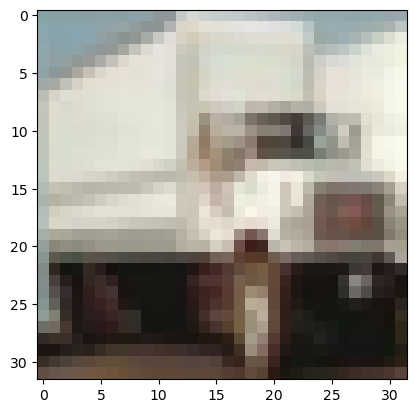

In [15]:
print(y_train[444])
plt.imshow(X_train[444])

#### 5. Convert y_train and y_test into categorical values

In [17]:
from keras.utils import to_categorical

In [18]:
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [19]:
y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

#### 6. Convert train data into float and scale

In [20]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

#### 7. Build your first CNN

In [21]:
model = Sequential()

In [22]:
model.add(Conv2D(filters=32, kernel_size=(5,5), strides=(2,2), padding='same', activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(5,5), strides=(2,2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

#### 8. Print summary and verify your configuration (Total params: 181, 162)

In [25]:
model.build(input_shape = (None, 32, 32, 3)) 

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 32)          25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 4, 4, 32)          0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 4, 4, 32)          0         
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                        

#### 9. Compile and fit and validate your model with the following parameters

In [30]:
import tensorflow as tf

In [32]:
opt = tf.keras.optimizers.legacy.SGD()
loss = 'categorical_crossentropy'
met = ['accuracy']

In [33]:
model.compile(optimizer=opt, loss=loss, metrics=met)

In [34]:
history = model.fit(X_train, y_train, shuffle=True, epochs=15, batch_size=32, validation_split=0.2)

Epoch 1/15
1250/1250 [==============================] - 50s 39ms/step - loss: 2.1547 - accuracy: 0.1924 - val_loss: 1.9387 - val_accuracy: 0.3213
Epoch 2/15
1250/1250 [==============================] - 45s 36ms/step - loss: 1.8844 - accuracy: 0.3149 - val_loss: 1.7194 - val_accuracy: 0.3900
Epoch 3/15
1250/1250 [==============================] - 45s 36ms/step - loss: 1.7203 - accuracy: 0.3738 - val_loss: 1.6207 - val_accuracy: 0.4193
Epoch 4/15
1250/1250 [==============================] - 46s 37ms/step - loss: 1.6207 - accuracy: 0.4074 - val_loss: 1.5292 - val_accuracy: 0.4585
Epoch 5/15
1250/1250 [==============================] - 44s 35ms/step - loss: 1.5532 - accuracy: 0.4360 - val_loss: 1.4389 - val_accuracy: 0.4800
Epoch 6/15
1250/1250 [==============================] - 42s 33ms/step - loss: 1.5087 - accuracy: 0.4540 - val_loss: 1.4012 - val_accuracy: 0.4954
Epoch 7/15
1250/1250 [==============================] - 42s 33ms/step - loss: 1.4671 - accuracy: 0.4690 - val_loss: 1.4096 -

In [35]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

Test loss: 1.1783320903778076
Test accuracy: 58.2099974155426


#### Part - II : Model Improvements

In [36]:
model1 = Sequential()
model1.add(Conv2D(filters=32, kernel_size=(5,5), strides=1, padding='same', activation='relu'))
model1.add(Conv2D(filters=32, kernel_size=(5,5), strides=1, padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Conv2D(filters=64, kernel_size=(5,5), strides=1, padding='same', activation='relu'))
model1.add(Conv2D(filters=64, kernel_size=(5,5), strides=1, padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.25))
model1.add(Flatten())
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(10, activation='softmax'))
model1.compile(optimizer='adam', loss=loss, metrics=met)
history1 = model1.fit(X_train, y_train, shuffle=True, epochs=5, batch_size=32, validation_split=0.2)
score1 = model1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1]*100)

Epoch 1/5
1250/1250 [==============================] - 586s 465ms/step - loss: 1.6237 - accuracy: 0.4011 - val_loss: 1.2959 - val_accuracy: 0.5316
Epoch 2/5
1250/1250 [==============================] - 580s 464ms/step - loss: 1.2182 - accuracy: 0.5659 - val_loss: 1.1510 - val_accuracy: 0.5859
Epoch 3/5
1250/1250 [==============================] - 589s 471ms/step - loss: 1.0186 - accuracy: 0.6424 - val_loss: 0.9185 - val_accuracy: 0.6732
Epoch 4/5
1250/1250 [==============================] - 610s 488ms/step - loss: 0.9015 - accuracy: 0.6841 - val_loss: 0.8677 - val_accuracy: 0.6983
Epoch 5/5
1250/1250 [==============================] - 586s 469ms/step - loss: 0.8085 - accuracy: 0.7160 - val_loss: 0.8074 - val_accuracy: 0.7206
Test loss: 0.8270379900932312
Test accuracy: 71.5399980545044
